## Heart disease Analysis

### Project Objective
The goal of this project is to predict whether a patient has heart disease using various medical features and machine learning algorithms. Accurate prediction of heart disease can help in early diagnosis and timely treatment, potentially saving lives. 

In this project, we implement and compare two popular machine learning models:
- **K-Nearest Neighbors (KNN)**
- **Decision Tree Classifier**

We use a structured dataset containing demographic, clinical, and diagnostic features of patients, and evaluate model performance based on metrics such as Accuracy, Precision, Recall, and F1-score.


### Introduction Features

1-Age : age of the patient [years]

2-Sex :  Sex of the patient\
 M : Male
 F : Female

3- ChestPainType : chest pain type
 TA : Typical Angina
 ATA : Atypical Angina
 NAP : Non-Anginal Pain,
 ASY : Asymptonic

4-RestingBP : Resting blood pressure [mmHg]: When your heart is at rest, between beats, your blood pressure falls.

5-Cholesterol : serum cholesterol [mm/dl]

6-FastingBS : fasting blood sugar
 1 : if FastingBS > 120 mg/dl
    0 : otherwise

7-RestingECG : Resting electrocardiogram results
 Normal : Normal
 ST : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05

8-MaxHR : maximum heart rate achived [Numeric value between 60 and 202]

9-ExerciseAngina : exercise-induced angina
 Y : Yes
 N : No

10-Oldpeak : oldpeak [Numeric value measured in depression]

11-ST_Slope : the slope of the peak exercise ST segment
 Up : upsloping
 Flat : flat
 Down : downsloping

12-HeartDisease : output class
 1 : heart disease
 0 : normal

### Importing library


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [30]:
df=pd.read_csv('heart.csv')

In [31]:
df.head(100)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,M,ASY,130,263,0,Normal,140,Y,2.0,Flat,1
96,43,M,ATA,142,207,0,Normal,138,N,0.0,Up,0
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0


In [32]:
df.shape

(918, 12)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [34]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [35]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Data cleaning & EDA 

In [36]:
df['Classpred']=df['HeartDisease'].replace((0,1),('Normal','Heart disease'))

Text(0.5, 1.0, 'Histogram of Sex')

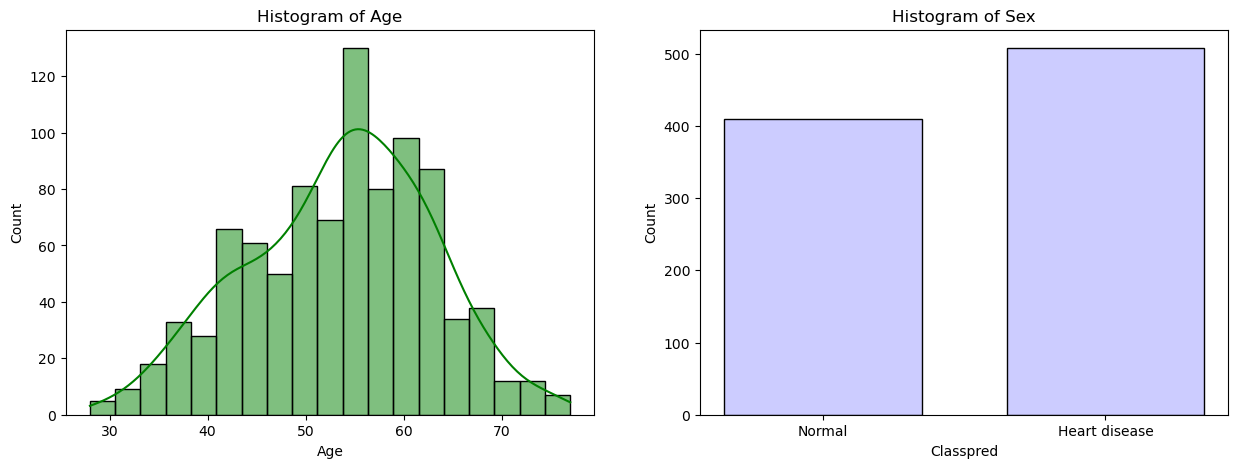

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x='Age', data=df,kde='True',color='green',edgecolor='black')
plt.title('Histogram of Age')

plt.subplot(1,2,2)

sns.histplot(x='Classpred', data=df,color='blue',edgecolor='black', alpha=0.2,binwidth=5,shrink = 0.7)
plt.title('Histogram of Sex')

In [38]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Age: most of members in this study are between 40 and 65 years
HeartDisease:This Dataset is imbalance and Heart disease is alittle more than Normal people

([<matplotlib.patches.Wedge at 0x2141b10aa10>,
 [Text(-0.8686626780128878, 0.6748519480800795, 'Male'),
  Text(0.8686626780128874, -0.67485194808008, 'Female')],
 [Text(-0.47381600618884784, 0.3681010625891342, '78.98%'),
  Text(0.4738160061888476, -0.3681010625891345, '21.02%')])

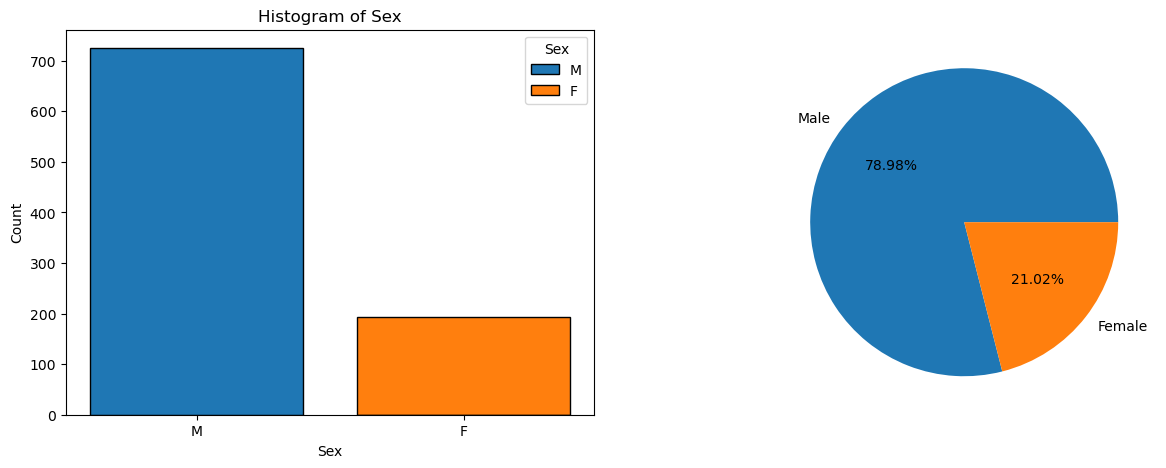

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x='Sex', data=df,hue='Sex', alpha=1, shrink=0.8)
plt.title('Histogram of Sex')

plt.subplot(1,2,2)
male,female=df['Sex'].value_counts()
y=[male,female]
labels=['Male','Female']
plt.pie(y, labels=labels,autopct='%.2f%%')

Sex: most of members in this study are men.about 79% are men.

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [41]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [42]:
df['FastingBS'].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

Text(0.5, 1.0, 'Oldpeak')

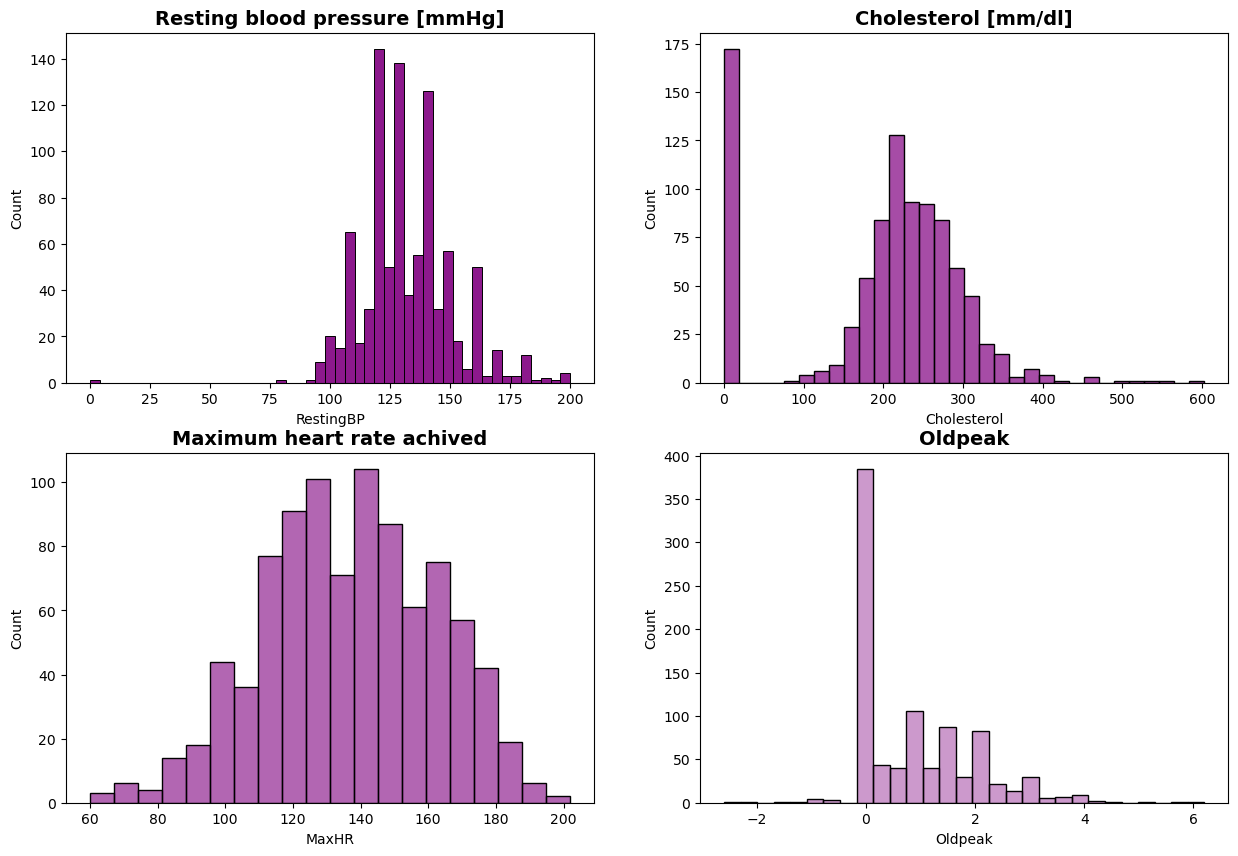

In [43]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x='RestingBP',data=df,color='purple',alpha=0.9)   
plt.title('Resting blood pressure [mmHg]',fontsize=14, fontweight='bold')

plt.subplot(2,2,2)
sns.histplot(x='Cholesterol',data=df,color='purple',alpha=0.7)
plt.title('Cholesterol [mm/dl]',fontsize=14, fontweight='bold')

plt.subplot(2,2,3)
sns.histplot(x='MaxHR',data=df,color='purple',alpha=0.6)
plt.title('Maximum heart rate achived',fontsize=14, fontweight='bold')

plt.subplot(2,2,4)
sns.histplot(x='Oldpeak',data=df,color='purple',alpha=0.4)
plt.title('Oldpeak',fontsize=14,fontweight='bold')

Resting blood pressure: THis paramete is between 75 and 200 mmHg .most participants have about 100 to 160 mmHg.

Cholesterol: This parameter is between 0 and 600 .175 participants have 0 mm/dl and majoriti other participants have 100 to 400.

Maximum heart rate achived: It is between 60 and 200.

Oldpeak: About 400 participants have 0 oldpeak. a few participants have negative oldpeak(Less than 10 people)and other participants have between 0 and 6 oldpeak.


Text(0.5, 1.0, 'Oldpeak')

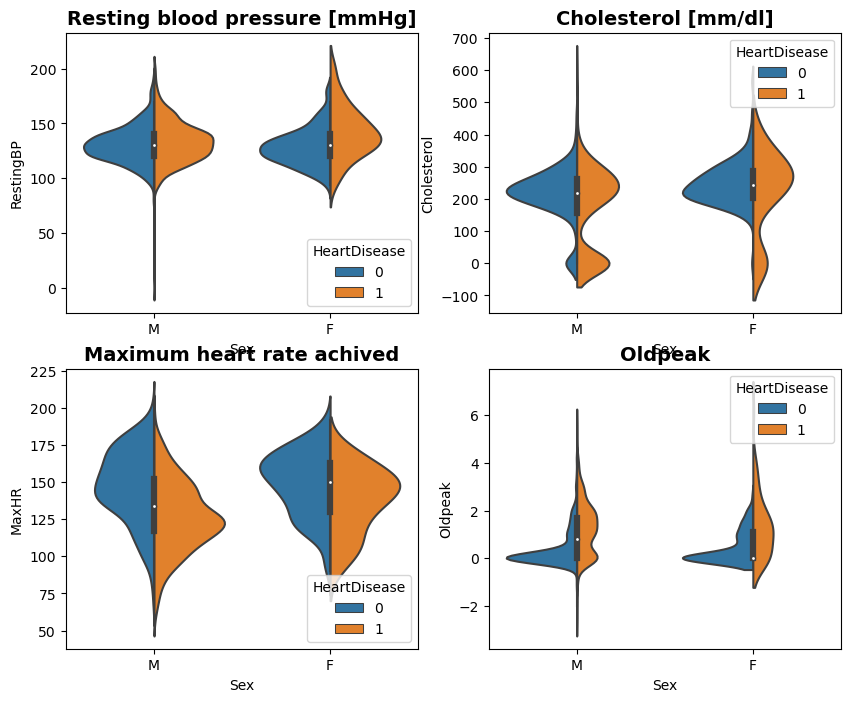

In [44]:
plt.figure(figsize=(10,8)) 
plt.subplot(2,2,1)
sns.violinplot(x='Sex' ,y='RestingBP',hue='HeartDisease' ,data=df ,split=True)
plt.title('Resting blood pressure [mmHg]',fontsize=14, fontweight='bold')

plt.subplot(2,2,2)
sns.violinplot(x='Sex' ,y='Cholesterol',hue='HeartDisease' ,data=df ,split=True)
plt.title('Cholesterol [mm/dl]',fontsize=14, fontweight='bold')

plt.subplot(2,2,3)
sns.violinplot(x='Sex' ,y='MaxHR',hue='HeartDisease' ,data=df ,split=True)
plt.title('Maximum heart rate achived',fontsize=14, fontweight='bold')

plt.subplot(2,2,4)
sns.violinplot(x='Sex' ,y='Oldpeak',hue='HeartDisease' ,data=df ,split=True)
plt.title('Oldpeak',fontsize=14,fontweight='bold')

Analysis of above parameters by differentiating gender,healthy and patient people

Resting blood pressure: For Men between normal and patient peaple are not much different they are almost the same.but It is For women normal people between 80 and 170 ,and patient people between 80 and 200 with more dispersion.

Cholesterol:Cholesterol for normal men has Normaler distribution than diseases men.For diseases men has two peak diagram.It is a Normal distribution between 150 to 500 for normal woman but for diseases women It has more dispersion(0 to 600) diagram with tow peak.

Maximum heart rate achived: In both of gender normal people has achived Maximum heart rate lower than diseases pople.but for men this differnce is more.

Oldpeak: In both of gender most of normal people has 0 oldpeak,but in diseases people it is very scatterd between -2 to 6.  

Text(0.5, 1.0, 'Oldpeak')

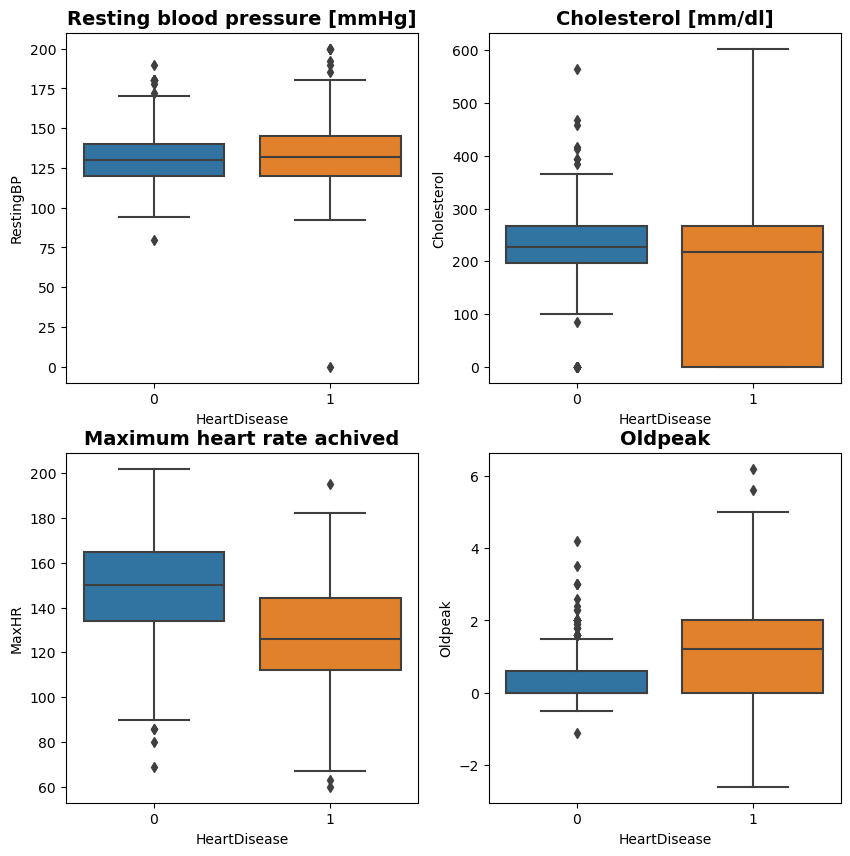

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y='RestingBP' ,x='HeartDisease',data=df )
plt.title('Resting blood pressure [mmHg]',fontsize=14, fontweight='bold')

plt.subplot(2,2,2)
sns.boxplot(y='Cholesterol' ,x='HeartDisease',data=df )
plt.title('Cholesterol [mm/dl]',fontsize=14, fontweight='bold')

plt.subplot(2,2,3)
sns.boxplot(y='MaxHR' ,x='HeartDisease',data=df )
plt.title('Maximum heart rate achived',fontsize=14, fontweight='bold')

plt.subplot(2,2,4)
sns.boxplot(y='Oldpeak' ,x='HeartDisease',data=df )
plt.title('Oldpeak',fontsize=14, fontweight='bold')

Resting blood pressure:It is the same in both group normal and diseases people in boxplot.

Cholesterol:Boxplot show this parameter has so different in two group normal and diseases people.most normal people's cholesterol is in range 200 to 290 and most diseases people's cholesterol is in range 0 to 290.

Maximum heart rate achived:Boxplot also show normal peaple's mean is more than disease people in this parameter.

Oldpeak: most normal people's oldpeak is 0 but for disease people is in range 0 to 2.

<Axes: xlabel='Oldpeak', ylabel='Age'>

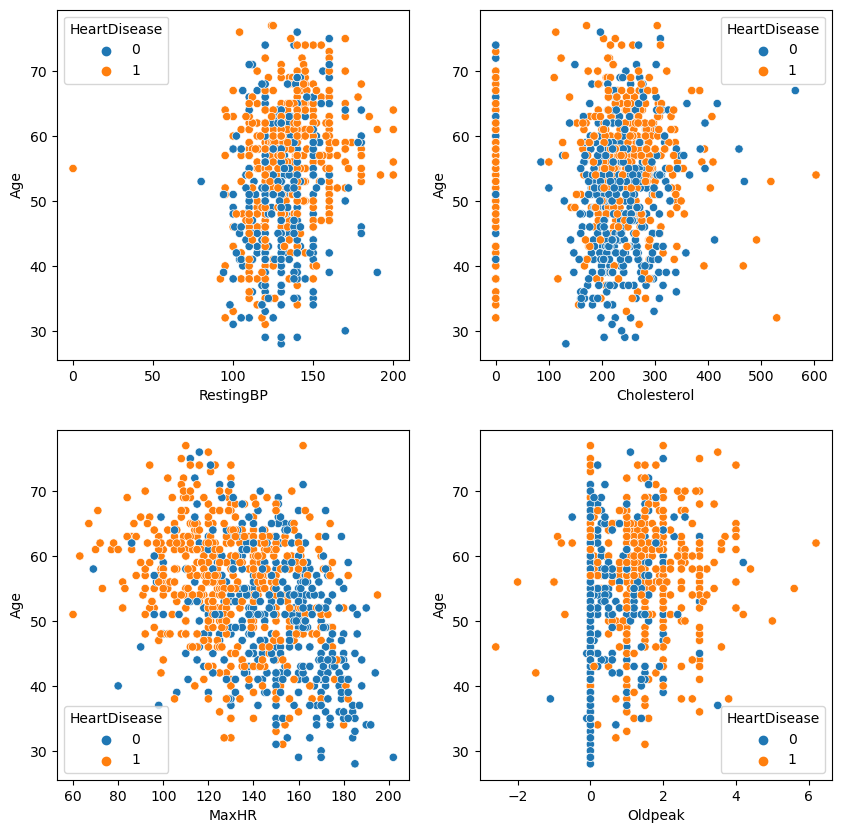

In [20]:
#scatter plot
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.scatterplot(y='Age',x='RestingBP',hue='HeartDisease',data=df)

plt.subplot(2,2,2)
sns.scatterplot(y='Age',x='Cholesterol',hue='HeartDisease',data=df)

plt.subplot(2,2,3
sns.scatterplot(y='Age',x='MaxHR', hue='HeartDisease',data=df)

plt.subplot(2,2,4)
sns.scatterplot(y='Age',x='Oldpeak',hue='HeartDisease',data=df)

Two parameter Resting blood pressure and Cholesterol are not corrolation with Age.

Maximum heart rate achived:there are negative corrolation between Maximum heart rate achived and Age.yunger and normal people has achived higher heart rate than older people and also diseases people.

Oldpeak: Oldpeak has a little positive corrolation with Age.

<Axes: >

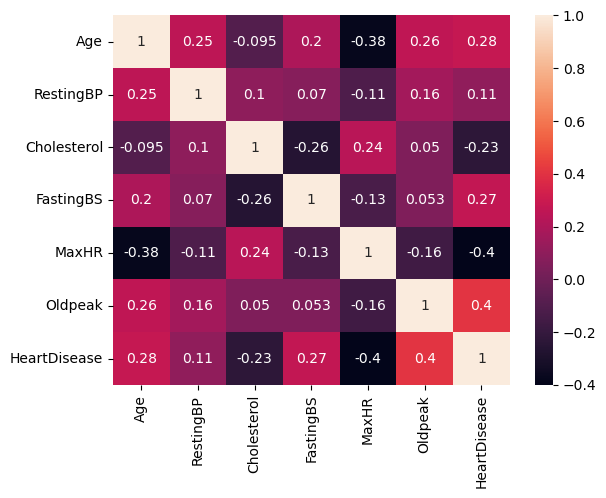

In [21]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

In [22]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Classpred
count,918,918,918,918,918,918
unique,2,4,3,2,3,2
top,M,ASY,Normal,N,Flat,Heart disease
freq,725,496,552,547,460,508


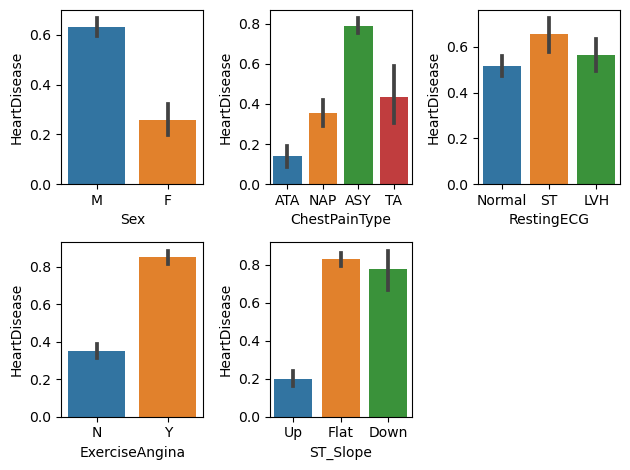

In [45]:
dfo = df.iloc[:, [1,2,6,8,10]]  ###############
for i, j in enumerate(dfo.columns):
    plt.subplot(2, 3, i+1)
    sns.barplot(x=j, y='HeartDisease', data=df)  # دقت کن data باید df اصلی باشه چون HeartDisease توی df هست
plt.tight_layout()
plt.show()

In [46]:
df.drop('Classpred',axis=1,inplace=True)

### object data transform to numeric

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']:
    df[i]=le.fit_transform(df[i])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


### Splitting X,y

In [13]:
X=df.iloc[:,:11]
y=df['HeartDisease']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, stratify=y)

In [113]:
##from sklearn.preprocessing import StandardScaler --scX=StandardScaler()--X_train=scX.fit_transform(X_train)--X_test=scX.transform(X_test)

### Training with KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11,metric='minkowski', p=2)
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=11)

In [16]:
y_pred=knn.predict(X_test)
knn.score(X_test, y_test)

0.7554347826086957

In [102]:
#fbKXtrain=[] ##############
#for i in range(1,len(X_train)):
#    knn=KNeighborsClassifier(n_neighbors=i)
#    knn.fit(X_train , y_train)
#    fbKXtrain.append(knn.score(X_test, y_test))
    
#ok=max(fbKXtrain)
#ok

In [17]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

<Axes: >

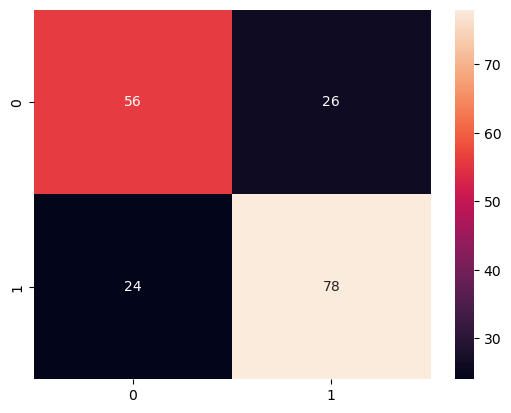

In [119]:
cm=confusion_matrix(y_test , y_pred)
cmdf=pd.DataFrame(cm)
sns.heatmap(cm , annot=True)

In [120]:
accuracy_score(y_test,y_pred)

0.7282608695652174

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73        82
           1       0.78      0.77      0.78       102

    accuracy                           0.76       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.76      0.76      0.76       184



### Decision Tree Classifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, stratify=y, random_state=15)

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train , y_train)

DecisionTreeClassifier()

In [32]:
y_pred1=dtc.predict(X_test)

In [33]:
dtc.score(X_test, y_test)

0.8315217391304348

In [34]:
print(confusion_matrix(y_test , y_pred1))

[[66 16]
 [15 87]]


<Axes: >

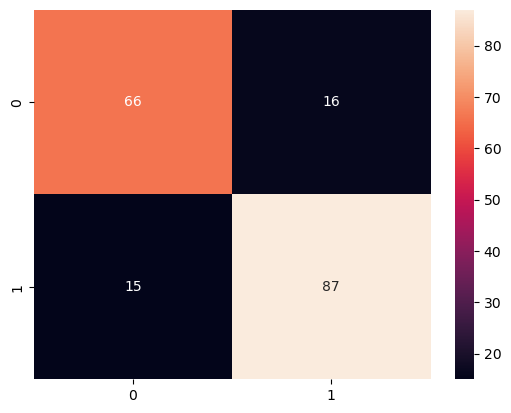

In [35]:
sns.heatmap(confusion_matrix(y_test , y_pred1), annot=True)

In [36]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        82
           1       0.84      0.85      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



In [37]:
features=pd.DataFrame(dtc.feature_importances_ , index=X.columns)
features

,0
Age,0.063357
Sex,0.032764
ChestPainType,0.117189
RestingBP,0.071821
Cholesterol,0.108802
FastingBS,0.010332
RestingECG,0.006430
MaxHR,0.098195
ExerciseAngina,0.015436
Oldpeak,0.096253
